In [271]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [272]:
amazon_raw = pd.read_csv('amazon_cells_labelled.txt',  delimiter='\t', header = None)
amazon_raw.columns = ['message', 'score']
#amazon_raw.head()

In [273]:
imdb_raw = pd.read_csv('imdb_labelled.txt',  delimiter='\t', header = None)
imdb_raw.columns = ['message', 'score']
#imdb_raw.head()

In [274]:
yelp_raw = pd.read_csv('yelp_labelled.txt',  delimiter='\t', header = None)
yelp_raw.columns = ['message', 'score']
#yelp_raw.head()

In [275]:
df = pd.DataFrame(columns=['message', 'score'])
data_raw = df.append([amazon_raw,imdb_raw,yelp_raw])
data_raw.head()

,message,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [276]:
keywords = ['poor', 'problem', 'bad', 'worst', 'waste', 'disappointed',
            'horrible', 'terrible', 'last', 'crap', 'never', ] 
for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    data_raw[str(key)] = data_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [277]:
data_raw.head()

,message,score,poor,problem,bad,worst,waste,disappointed,horrible,terrible,last,crap,never
0,So there is no way for me to plug it in here i...,0,False,False,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",1,False,False,False,False,False,False,False,False,False,False,False
2,Great for the jawbone.,1,False,False,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,0,False,False,False,False,False,False,False,False,False,False,False
4,The mic is great.,1,False,False,False,False,False,False,False,False,False,False,False


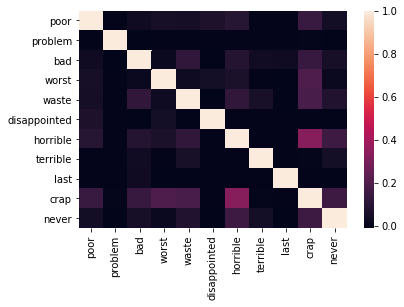

In [278]:
sns.heatmap(data_raw.corr())

In [279]:
data = data_raw[keywords]
target = data_raw['score']
target = target.astype('int')

In [280]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 2748 points : 1215


In [281]:
def calc_accuracy(conf_matrix):
    total = sum(sum(l) for l in conf_matrix)
    return sum(conf_matrix[i][i] for i in range(len(conf_matrix))) / total

y_actual = np.array(data_raw['score'])
y_actual = y_actual.astype('int')

calc_accuracy(confusion_matrix(y_actual,y_pred))

0.5578602620087336

In [282]:
confusion_matrix(target, y_pred)

array([[ 166, 1196],
       [  19, 1367]])

- 1197 false positives
- 19 false negatives

In [283]:
data_raw['Pred'] = y_pred
#data_raw.head()

In [284]:
#percentage of positives correctly identified

def calc_sensitivity(df, actual, pred):
    result = len(df[(df[actual]==True) & (df[pred]==True)])/len(df[df[actual]==True])
    return result

calc_sensitivity(data_raw, 'score', 'Pred')

0.9862914862914863

- 98.63% of spam correctly identified

In [285]:
#percentage of negatives correctly identified

def calc_specificity(df, actual, pred):
    result = len(df[(df[actual]==False) & (df[pred]==False)])/len(df[df[actual]==False])
    return result

calc_specificity(data_raw, 'score', 'Pred')

0.12187958883994127

- 12.19% of ham correctly identified

### Test your model with different holdout groups

In [286]:
from sklearn.model_selection import train_test_split

# Use train_test_split to create the necessary training and test groups

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.5545454545454546
Testing on Sample: 0.5578602620087336


In [287]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.4, random_state=20)
print('With 40% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 40% Holdout: 0.5509090909090909
Testing on Sample: 0.5578602620087336


In [288]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.6, random_state=20)
print('With 60% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 60% Holdout: 0.5482110369921165
Testing on Sample: 0.5578602620087336


In [289]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.52536232, 0.55434783, 0.53818182, 0.56363636, 0.56727273,
       0.55636364, 0.60218978, 0.56934307, 0.54379562, 0.54014599])

## Create Five Classifier Versions

### Classifier #1

In [290]:
class1_raw = df.append([amazon_raw,imdb_raw,yelp_raw])

In [291]:
keywords1 = ['poor', 'problem', 'bad', 'worst', 'waste', 'disappointed',
             'horrible', 'terrible', 'last', 'crap', 'never', ] 
for key in keywords1:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    class1_raw[str(key)] = class1_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )


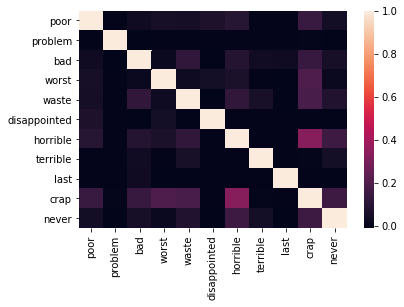

In [292]:
sns.heatmap(class1_raw.corr())

In [293]:
data1 = class1_raw[keywords1]
target1 = class1_raw['score']
target1 = target1.astype('int')

In [294]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data1, target1)

# Classify, storing the result in a new variable.
y_pred1 = bnb.predict(data1)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data1.shape[0],
    (target1 != y_pred1).sum()
))

Number of mislabeled points out of a total 2748 points : 1215


In [295]:
def calc_accuracy(conf_matrix):
    total = sum(sum(l) for l in conf_matrix)
    return sum(conf_matrix[i][i] for i in range(len(conf_matrix))) / total

y_actual1 = np.array(class1_raw['score'])
y_actual1 = y_actual1.astype('int')

calc_accuracy(confusion_matrix(y_actual1,y_pred1))

0.5578602620087336

In [296]:
confusion_matrix(target1, y_pred1)

array([[ 166, 1196],
       [  19, 1367]])

- 1197 false positives
- 19 false negatives

In [297]:
class1_raw['Pred'] = y_pred1

In [298]:
#percentage of positives correctly identified

def calc_sensitivity(df, actual, pred):
    result = len(df[(df[actual]==True) & (df[pred]==True)])/len(df[df[actual]==True])
    return result

calc_sensitivity(data_raw, 'score', 'Pred')

0.9862914862914863

- 98.63% of spam correctly identified

In [299]:
#percentage of negatives correctly identified

def calc_specificity(df, actual, pred):
    result = len(df[(df[actual]==False) & (df[pred]==False)])/len(df[df[actual]==False])
    return result

calc_specificity(data_raw, 'score', 'Pred')

0.12187958883994127

- 12.19% of ham correctly identified

### Test model 1 with different holdout groups

In [300]:
from sklearn.model_selection import train_test_split

# Use train_test_split to create the necessary training and test groups

X_train, X_test, y_train, y_test = train_test_split(data1, target1, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data1, target1).score(data1, target1)))

With 20% Holdout: 0.5545454545454546
Testing on Sample: 0.5578602620087336


In [301]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.6, random_state=20)
print('With 60% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 60% Holdout: 0.5482110369921165
Testing on Sample: 0.5578602620087336


In [302]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.52536232, 0.55434783, 0.53818182, 0.56363636, 0.56727273,
       0.55636364, 0.60218978, 0.56934307, 0.54379562, 0.54014599])

- Variance between .5252 and .6022, may indicate an amount of overfitting.

### Classifier #2

In [303]:
class2_raw = df.append([amazon_raw,imdb_raw,yelp_raw]) 

In [304]:
keywords2 = ['poor', 'problem', 'bad', 'worst', 'waste', 'disappointed', 'horrible', 'terrible'] 
for key in keywords2:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    class2_raw[str(key)] = class2_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

- Deleted 'last, 'crap', 'never' from keywords

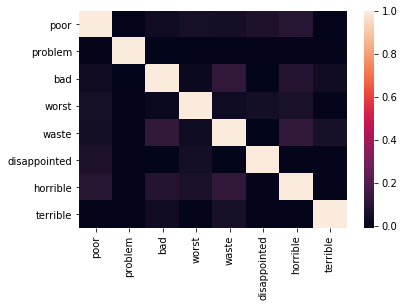

In [305]:
sns.heatmap(class2_raw.corr())

In [306]:
data2 = class2_raw[keywords2]
target2 = class2_raw['score']
target2 = target2.astype('int')

In [307]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data2, target2)

# Classify, storing the result in a new variable.
y_pred2 = bnb.predict(data2)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data2.shape[0],
    (target2 != y_pred2).sum()
))

Number of mislabeled points out of a total 2748 points : 1232


In [308]:
def calc_accuracy(conf_matrix):
    total = sum(sum(l) for l in conf_matrix)
    return sum(conf_matrix[i][i] for i in range(len(conf_matrix))) / total

y_actual2 = np.array(class2_raw['score'])
y_actual2 = y_actual2.astype('int')

calc_accuracy(confusion_matrix(y_actual2,y_pred2))

0.5516739446870451

In [309]:
confusion_matrix(target2, y_pred2)

array([[ 139, 1223],
       [   9, 1377]])

- 1223 false positives
- 9 false negatives

In [310]:
class2_raw['Pred'] = y_pred2

In [311]:
#percentage of positives correctly identified

def calc_sensitivity(df, actual, pred):
    result = len(df[(df[actual]==True) & (df[pred]==True)])/len(df[df[actual]==True])
    return result

calc_sensitivity(class2_raw, 'score', 'Pred')

0.9935064935064936

- 99.35% of spam correctly identified

In [312]:
#percentage of negatives correctly identified

def calc_specificity(df, actual, pred):
    result = len(df[(df[actual]==False) & (df[pred]==False)])/len(df[df[actual]==False])
    return result

calc_specificity(class2_raw, 'score', 'Pred')

0.10205580029368576

- 10.21% of ham correctly identified

### Test model 2 with different holdout groups

In [313]:
# Use train_test_split to create the necessary training and test groups

X_train, X_test, y_train, y_test = train_test_split(data2, target2, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data2, target2).score(data2, target2)))

With 20% Holdout: 0.5418181818181819
Testing on Sample: 0.5516739446870451


In [314]:
X_train, X_test, y_train, y_test = train_test_split(data2, target2, test_size=0.6, random_state=20)
print('With 60% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data2, target2).score(data2, target2)))

With 60% Holdout: 0.5457853244390539
Testing on Sample: 0.5516739446870451


In [315]:
cross_val_score(bnb, data2, target2, cv=10)

array([0.5326087 , 0.54710145, 0.53454545, 0.55636364, 0.57090909,
       0.56363636, 0.58394161, 0.54744526, 0.53649635, 0.54379562])

- Variance between .5326 and .5839, may indicate an amount of overfitting, but is better than classifier #1

### Classifier #3

In [316]:
class3_raw = df.append([amazon_raw,imdb_raw,yelp_raw]) 

In [317]:
keywords3 = ['poor', 'problem', 'worst', 'waste', 'disappointed', 'terrible'] 
for key in keywords3:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    class3_raw[str(key)] = class3_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

- Delete high correlated words from classifier #2; 'bad', 'horrible'

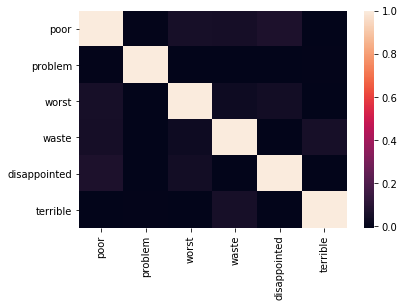

In [318]:
sns.heatmap(class3_raw.corr())

In [319]:
data3 = class3_raw[keywords3]
target3 = class3_raw['score']
target3 = target3.astype('int')

In [320]:
# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data3, target3)

# Classify, storing the result in a new variable.
y_pred3 = bnb.predict(data3)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data3.shape[0],
    (target3 != y_pred3).sum()
))

Number of mislabeled points out of a total 2748 points : 1277


In [321]:
def calc_accuracy(conf_matrix):
    total = sum(sum(l) for l in conf_matrix)
    return sum(conf_matrix[i][i] for i in range(len(conf_matrix))) / total

y_actual3 = np.array(class3_raw['score'])
y_actual3 = y_actual3.astype('int')

calc_accuracy(confusion_matrix(y_actual3,y_pred3))

0.5352983988355168

In [322]:
confusion_matrix(target3, y_pred3)

array([[  90, 1272],
       [   5, 1381]])

- 1272 false positives
- 5 false negatives

In [323]:
class3_raw['Pred'] = y_pred3

In [324]:
#percentage of positives correctly identified

def calc_sensitivity(df, actual, pred):
    result = len(df[(df[actual]==True) & (df[pred]==True)])/len(df[df[actual]==True])
    return result

calc_sensitivity(class3_raw, 'score', 'Pred')

0.9963924963924964

- 99.64% of spam correctly identified

In [325]:
#percentage of negatives correctly identified

def calc_specificity(df, actual, pred):
    result = len(df[(df[actual]==False) & (df[pred]==False)])/len(df[df[actual]==False])
    return result

calc_specificity(class3_raw, 'score', 'Pred')

0.06607929515418502

- 6.61% of ham correctly identified

### Test model 3 with different holdout groups

In [326]:
# Use train_test_split to create the necessary training and test groups

X_train, X_test, y_train, y_test = train_test_split(data3, target3, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data3, target3).score(data3, target3)))

With 20% Holdout: 0.5254545454545455
Testing on Sample: 0.5352983988355168


In [327]:
# Use train_test_split to create the necessary training and test groups

X_train, X_test, y_train, y_test = train_test_split(data3, target3, test_size=0.6, random_state=20)
print('With 60% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data3, target3).score(data3, target3)))

With 60% Holdout: 0.530018192844148
Testing on Sample: 0.5352983988355168


In [328]:
cross_val_score(bnb, data3, target3, cv=10)

array([0.52898551, 0.53623188, 0.52      , 0.55272727, 0.53090909,
       0.53090909, 0.55474453, 0.53284672, 0.53284672, 0.53284672])

- Variance between .529 and .5547, may indicate an amount of overfitting, but is better than classifier #2

### Classifier #4

In [329]:
class4_raw = df.append([amazon_raw,imdb_raw,yelp_raw]) 

In [330]:
class4_raw.head()

,message,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [331]:
class4_spam = class4_raw[class4_raw['score'] == 0]
class4_spam.head()

,message,score
0,So there is no way for me to plug it in here i...,0
3,Tied to charger for conversations lasting more...,0
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
8,"Needless to say, I wasted my money.",0


In [332]:
words_spam = list(class4_spam['message'].str.split(' ', expand=True).stack().unique())

In [333]:
words_spam_full_list = list(class4_spam['message'].str.split(' ', expand=True).stack())

In [334]:
filtered_words_spam = list(filter((words_matches).__ne__, words_spam))

In [335]:
from collections import Counter

def count_many(needles, haystack):
    count = Counter(haystack)
    return {key: count[key] for key in count if key in needles}

spam_word_counts = count_many(filtered_words_spam, words_spam_full_list)

In [336]:
#spam_word_counts

In [337]:
keywords4 = ['poor', 'problem', 'worst', 'waste', 'terrible', 'wasted',
             'excessive', 'last.', 'instructions', 
             "Doesn't", 'breakage', 'unusable', 'hate', 'worthless', 'Disappointed', 
             'Not', 'VERY', 'Beware,', 'unhappy', 'dropped', 'problems','embarrassing', 
             'horrible','Unreliable', 'bad', 'difficult', 'returning',
             'cumbersome.'] 
for key in keywords4:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    class4_raw[str(key)] = class4_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

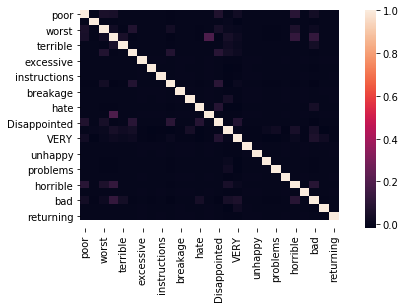

In [338]:
sns.heatmap(class4_raw.corr())

In [339]:
data4 = class4_raw[keywords4]
target4 = class4_raw['score']
target4 = target4.astype('int')

In [340]:
# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data4, target4)

# Classify, storing the result in a new variable.
y_pred4 = bnb.predict(data4)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data4.shape[0],
    (target4 != y_pred4).sum()
))

Number of mislabeled points out of a total 2748 points : 1036


In [341]:
def calc_accuracy(conf_matrix):
    total = sum(sum(l) for l in conf_matrix)
    return sum(conf_matrix[i][i] for i in range(len(conf_matrix))) / total

y_actual4 = np.array(class4_raw['score'])
y_actual4 = y_actual4.astype('int')

calc_accuracy(confusion_matrix(y_actual4,y_pred4))

0.6229985443959243

In [342]:
confusion_matrix(target4, y_pred4)

array([[ 386,  976],
       [  60, 1326]])

- 976 false positives
- 60 false negatives

In [343]:
class4_raw['Pred'] = y_pred4

In [344]:
#percentage of positives correctly identified

def calc_sensitivity(df, actual, pred):
    result = len(df[(df[actual]==True) & (df[pred]==True)])/len(df[df[actual]==True])
    return result

calc_sensitivity(class4_raw, 'score', 'Pred')

0.9567099567099567

- 95.67% of spam correctly identified

In [345]:
#percentage of negatives correctly identified

def calc_specificity(df, actual, pred):
    result = len(df[(df[actual]==False) & (df[pred]==False)])/len(df[df[actual]==False])
    return result

calc_specificity(class4_raw, 'score', 'Pred')

0.2834067547723935

- 28.34% of ham correctly identified

### Test model 4 with different holdout groups

In [346]:
# Use train_test_split to create the necessary training and test groups

X_train, X_test, y_train, y_test = train_test_split(data4, target4, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data4, target4).score(data4, target4)))

With 20% Holdout: 0.6218181818181818
Testing on Sample: 0.6229985443959243


In [347]:
X_train, X_test, y_train, y_test = train_test_split(data4, target4, test_size=0.6, random_state=20)
print('With 60% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data4, target4).score(data4, target4)))

With 60% Holdout: 0.6118859915100061
Testing on Sample: 0.6229985443959243


In [348]:
cross_val_score(bnb, data4, target4, cv=10)

array([0.65942029, 0.63405797, 0.62909091, 0.62181818, 0.6       ,
       0.59272727, 0.62773723, 0.61313869, 0.62773723, 0.60218978])

- Variance between .5927 and .6594, may indicate an amount of overfitting

### Classifier #5

In [349]:
class5_raw = df.append([amazon_raw,imdb_raw,yelp_raw]) 

In [350]:
class5_ham = class5_raw[class5_raw['score'] == 1]
class5_ham.head()

,message,score
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
4,The mic is great.,1
7,If you are Razr owner...you must have this!,1
10,And the sound quality is great.,1


In [351]:
class5_spam = class5_raw[class5_raw['score'] == 0]
class5_spam.head()

,message,score
0,So there is no way for me to plug it in here i...,0
3,Tied to charger for conversations lasting more...,0
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
8,"Needless to say, I wasted my money.",0


In [352]:
words_ham5 = list(class5_ham['message'].str.split(' ', expand=True).stack().unique())

In [353]:
words_spam5 = list(class5_spam['message'].str.split(' ', expand=True).stack().unique())

In [354]:
words_matches5 = set(words_spam5) & set(words_ham5)

In [355]:
filtered_words_spam5 = [x for x in words_spam5 if x not in words_matches5]

In [356]:
words_spam_full_list5 = list(class5_spam['message'].str.split(' ', expand=True).stack())

In [357]:
from collections import Counter

def count_many(needles, haystack):
    count = Counter(haystack)
    return {key: count[key] for key in count if key in needles}

spam_word_counts5 = count_many(filtered_words_spam5, words_spam_full_list5)

In [358]:
import operator
sorted_word_counts = sorted(spam_word_counts5.items(), key=operator.itemgetter(1), reverse=True)
#sorted_word_counts

In [359]:
keywords5 = ['money', 'disappointed', 'poor', 'NOT', 'terrible', 'stupid', 'Worst', 'worse', 'wasted', 'hate', 'Bad',
            'bad,', 'awful.', 'Even', 'average', 'mediocre', 'sucked.', 'slow.', 'difficult', 'Unfortunately,'] 
for key in keywords5:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    class5_raw[str(key)] = class5_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

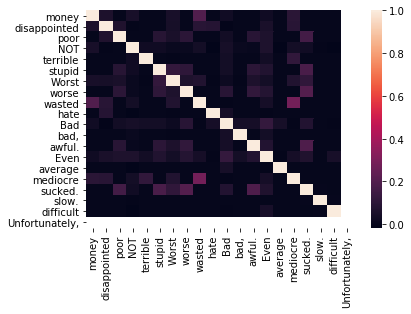

In [360]:
sns.heatmap(class5_raw.corr())

In [361]:
data5 = class5_raw[keywords5]
target5 = class5_raw['score']
target5 = target5.astype('int')

In [362]:
# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data5, target5)

# Classify, storing the result in a new variable.
y_pred5 = bnb.predict(data5)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data5.shape[0],
    (target5 != y_pred5).sum()
))

Number of mislabeled points out of a total 2748 points : 1054


In [363]:
def calc_accuracy(conf_matrix):
    total = sum(sum(l) for l in conf_matrix)
    return sum(conf_matrix[i][i] for i in range(len(conf_matrix))) / total

y_actual5 = np.array(class5_raw['score'])
y_actual5 = y_actual5.astype('int')

calc_accuracy(confusion_matrix(y_actual5,y_pred5))

0.616448326055313

In [364]:
confusion_matrix(target5, y_pred5)

array([[ 376,  986],
       [  68, 1318]])

- 986 false positives
- 68 false negatives

In [365]:
class5_raw['Pred'] = y_pred5

In [366]:
#percentage of positives correctly identified

def calc_sensitivity(df, actual, pred):
    result = len(df[(df[actual]==True) & (df[pred]==True)])/len(df[df[actual]==True])
    return result

calc_sensitivity(class5_raw, 'score', 'Pred')

0.950937950937951

- 95.1% of spam correctly identified

In [367]:
#percentage of negatives correctly identified

def calc_specificity(df, actual, pred):
    result = len(df[(df[actual]==False) & (df[pred]==False)])/len(df[df[actual]==False])
    return result

calc_specificity(class5_raw, 'score', 'Pred')

0.27606461086637296

- 27.61% of ham correctly identified

### Test model 5 with different holdout groups

In [368]:
# Use train_test_split to create the necessary training and test groups

X_train, X_test, y_train, y_test = train_test_split(data5, target5, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data5, target5).score(data5, target5)))

With 20% Holdout: 0.6218181818181818
Testing on Sample: 0.616448326055313


In [369]:
X_train, X_test, y_train, y_test = train_test_split(data5, target5, test_size=0.6, random_state=20)
print('With 60% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data5, target5).score(data5, target5)))

With 60% Holdout: 0.613705275924803
Testing on Sample: 0.616448326055313


In [370]:
cross_val_score(bnb, data5, target5, cv=10)

array([0.5942029 , 0.63405797, 0.60363636, 0.60727273, 0.64      ,
       0.60727273, 0.62043796, 0.60218978, 0.64233577, 0.59854015])

- Variance between .5942 and .6423, may indicate an amount of overfitting, the result is better than classifier #4, but worse than classifier #3.

## Classifier Summary

#### Do any of your classification models seem to overfit?

- Model #3 gave the smallest variance in cross-validation testing, this model contained the least amount of features and presented the lowest amount of correlation between features. 
- Model #1 gave the most variance in cross-validation testing, it included features selected from a word cloud and there was an amount of correlation between a few of its features.  

#### Which model seems to perform the best, why?

- With respect to accuracy, model #4 comes out on top at 62.3%
- In light of spam detection, model #3 is best at 99.64% correct detection, however returns a 6.61% correct ham detetion.
- To categorize a best classifier, we must think of the cost in regards to false positives and negative in this system. It would be useful to get a product specific messsage data, as to better represent the maginality of the negative or positive sentiment. Since there is no way in this particular case to assign weights to negative or positive sentiments, it is concluded that model #4 is best given its classifier has the most accuracy of the five. 

#### Which features seemed to be most important to performance?

- The features that are shared between all models turned out to be 'poor' and 'terrible', which is expected as the classifier was trained to find negative sentiment.

In [270]:
keywords_matches = set(keywords1) & set(keywords2) & set(keywords3) & set(keywords4) & set(keywords5) 
keywords_matches

{'poor', 'terrible'}